## Import necessary libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = ''

## Create the Fred object

In [49]:
fred = Fred(api_key=fred_key)

## Search Fred for economic data

In [50]:
sp_search = fred.search('S&P', order_by='popularity')

In [51]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-03-30   2024-03-30   
CSUSHPINSA          CSUSHPINSA     2024-03-30   2024-03-30   
SP500                    SP500     2024-03-30   2024-03-30   
MEHOINUSA672N    MEHOINUSA672N     2024-03-30   2024-03-30   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-03-30   2024-03-30   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-03-28  Daily, Close   
CSUSHPINSA            1987-01-01      2024-01-01       Monthly   
SP500                 2014-03-31      2024-03-28  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-03-28  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-03-29 10:19:09-05:00   
CSUSHPINSA                           NSA  2024-03-26 08:11:02-05:00   
SP500                                NSA  2024-03-28 19:10:49-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-03-29 10:19:13-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

## Pull raw data

In [52]:
sp500 = fred.get_series(series_id='SP500')

In [53]:
sp500

2014-03-31    1872.34
2014-04-01    1885.52
2014-04-02    1890.90
2014-04-03    1888.77
2014-04-04    1865.09
               ...   
2024-03-22    5234.18
2024-03-25    5218.19
2024-03-26    5203.58
2024-03-27    5248.49
2024-03-28    5254.35
Length: 2609, dtype: float64

<Axes: >

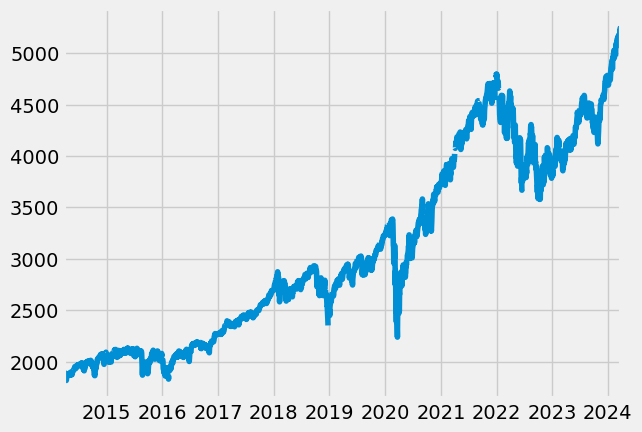

In [54]:
sp500.plot()

<Axes: title={'center': 'S&P500'}>

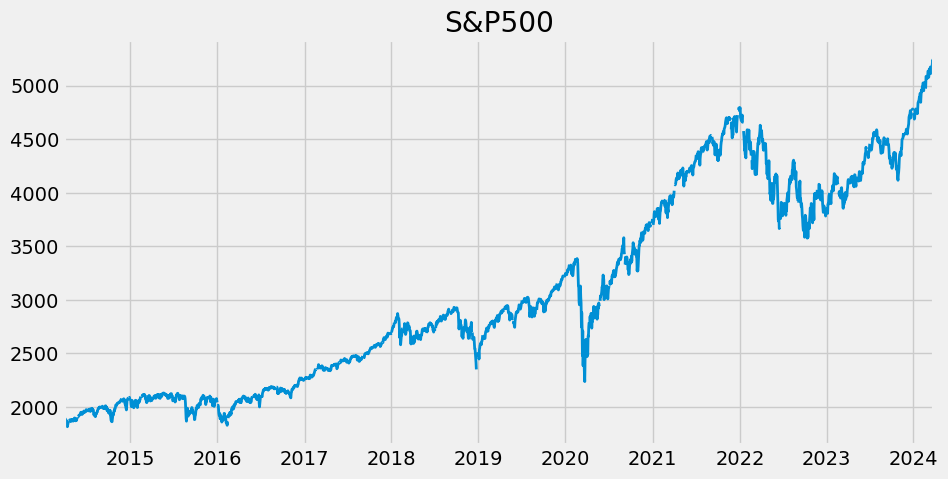

In [55]:
# making the chart wider, adding a title and making the line width smaller
sp500.plot(figsize=(10, 5), title='S&P500', lw=2)

## Pull and join multiple data series

In [56]:
unemployment_results = fred.search('unemployment')

In [57]:
unemployment_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-03-30   2024-03-30   
UNRATENSA                          UNRATENSA     2024-03-30   2024-03-30   
UNEMPLOY                            UNEMPLOY     2024-03-30   2024-03-30   
NROU                                    NROU     2024-03-30   2024-03-30   
CCSA                                    CCSA     2024-03-30   2024-03-30   
...                                      ...            ...          ...   
LAUMT134234000000003A  LAUMT134234000000003A     2024-03-30   2024-03-30   
LRHUTTTTUSQ156S              LRHUTTTTUSQ156S     2024-03-30   2024-03-30   
SAND706UR                          SAND706UR     2024-03-30   2024-03-30   
LNU04000029                      LNU04000029     2024-03-30   2024-03-30   
BUFF336UR                          BUFF336UR     2024-03-30   2024-03-30   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUMT134234000000003A            Unemployment Rate in Savannah, GA (MSA)   
LRHUTTTTUSQ156S        Harmonized Unemployment: Monthly Rates: Total:...   
SAND706UR              Unemployment Rate in San Diego-Carlsbad, CA (MSA)   
LNU04000029              Unemployment Rate - 20 Yrs. & over, White Women   
BUFF336UR              Unemployment Rate in Buffalo-Cheektowaga-Niaga...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-02-01   
UNRATENSA                    1948-01-01      2024-02-01   
UNEMPLOY                     1948-01-01      2024-02-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-03-16   
...                                 ...             ...   
LAUMT134234000000003A        1990-01-01      2022-01-01   
LRHUTTTTUSQ156S              1960-01-01      2023-10-01   
SAND706UR                    1990-01-01      2024-01-01   
LNU04000029                  1954-01-01      2024-02-01   
BUFF336UR                    1990-01-01      2024-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUMT134234000000003A                   Annual               A   
LRHUTTTTUSQ156S                      Quarterly               Q   
SAND706UR                              Monthly               M   
LNU04000029                            Monthly               M   
BUFF336UR                              Monthly               M   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
NROU                                Percent                  %   
CCSA                                 Numb

In [58]:
unrate = fred.get_series('UNRATE')

In [59]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
Length: 914, dtype: float64

<Axes: >

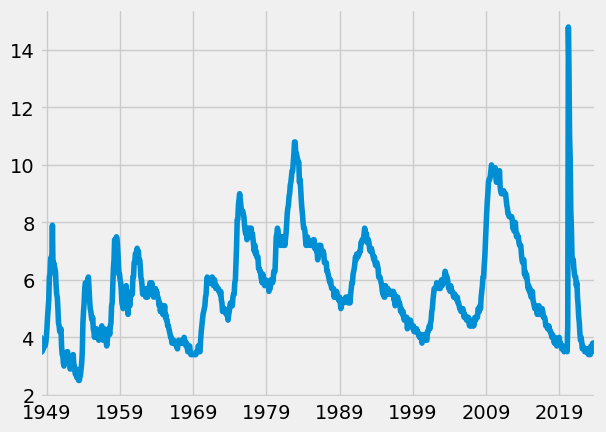

In [60]:
unrate.plot()

In [61]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [62]:
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-03-30   2024-03-30   
UNRATENSA      UNRATENSA     2024-03-30   2024-03-30   
LNS14000006  LNS14000006     2024-03-30   2024-03-30   
UNEMPLOY        UNEMPLOY     2024-03-30   2024-03-30   
LNU04000006  LNU04000006     2024-03-30   2024-03-30   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-03-30   2024-03-30   
SCMARI7URN    SCMARI7URN     2024-03-30   2024-03-30   
VAALBE7URN    VAALBE7URN     2024-03-30   2024-03-30   
HAGE124UR      HAGE124UR     2024-03-30   2024-03-30   
MIINGH5URN    MIINGH5URN     2024-03-30   2024-03-30   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-02-01   Monthly               M   
UNRATENSA          1948-01-01      2024-02-01   Monthly               M   
LNS14000006        1972-01-01      2024-02-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-02-01   Monthly               M   
LNU04000006        1972-01-01      2024-02-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-02-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-01-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-01-01   Monthly               M   
HAGE124UR          1990-01-01      2024-01-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-01-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [63]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [64]:
unemp_df['title']

series id
UNRATE                                                Unemployment Rate
LNS14000006               Unemployment Rate - Black or African American
U6RATE                Total Unemployed, Plus All Persons Marginally ...
CAUR                                    Unemployment Rate in California
TXUR                                         Unemployment Rate in Texas
                                            ...                        
LNS14000150                             Unemployment Rate - Married Men
NEIPTERM156SFRBRIC    Hornstein-Kudlyak-Lange Non-Employment Index i...
LBSSA10                     Labor Force Participation Rate for Delaware
LBSSA44                 Labor Force Participation Rate for Rhode Island
LRUN25TTUSM156S       Unemployment Rate: Aged 25-54: All Persons for...
Name: title, Length: 161, dtype: object

In [65]:
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE                 True
LNS14000006            True
U6RATE                False
CAUR                   True
TXUR                   True
                      ...  
LNS14000150            True
NEIPTERM156SFRBRIC    False
LBSSA10               False
LBSSA44               False
LRUN25TTUSM156S        True
Name: title, Length: 161, dtype: bool

In [66]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [67]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [68]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)


In [69]:
all_results[0]

UNRATE
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
...            ...
2023-10-01     3.8
2023-11-01     3.7
2023-12-01     3.7
2024-01-01     3.7
2024-02-01     3.9

[914 rows x 1 columns]

In [70]:
unemp_results = pd.concat(all_results, axis=1)
# pd.concat(all_results, axis=1).drop(['M0892AUSM156SNBR'], axis=1)

In [71]:
unemp_states = unemp_results.drop(['UNRATE', 'M0892AUSM156SNBR','LNS14000024', 'LNS14000031', 
                    'M0892BUSM156SNBR', 'U2RATE', 'LNS14000002', 'LNS14000009', 
                    'LNS14000003', 'LNS14000001', 'LNS14027660', 'LNS14027662',
                    'LNS14024887', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012',  
                    'LNS14027659', 'LASMT261982000000003','LNS14000060', 'LNS14000028', 
                    'LASMT391746000000003', 'LNS14000018', 'LNS14000036',  'LNS14000032', 
                    'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689','LNS14100000', 
                    'LNS14000315', 'LNS14000029', 'LNS14024230', 'LNS14000025', 
                    'LNS14000061', 'LRUNTTTTUSM156S', 'LNS14000026', 'LNS14000048', 
                    'LNS14000089','M08311USM156SNBR', 'LNS14000150', 'LRUN25TTUSM156S', 
                    'LNS14000006', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR', 'PRUR'], axis=1)

In [72]:
unemp_states

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   5.1   3.9   4.6   3.1   3.4   3.6   4.2   2.8   3.4   3.6   4.8   
2023-11-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.3   3.6   4.7   
2023-12-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.2   3.6   4.7   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.8   3.5   
2023-11-01   4.8   3.2   3.3   4.2   3.4   3.1   4.3   3.0   4.0   2.7   3.5   
2023-12-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.7   3.4   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.4   2.3   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-11-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-12-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.7   2.9   2.8   

            INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  IDUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   3.3   
2023-11-01   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   3.3   
2023-12-01   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   3.3   
2024-01-01   3.5   4.1   3.1   1.9   3.3   5.0   3.2   3.4   2.5   4.4   3.3   
2024-02-01   3.5   4.2   3.1   2.0   3.4   5.1   3.1   3.4   2.5   4.5   3.3   

            NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
192

In [73]:
unemp_states.isna()

CAUR   TXUR   NYUR   FLUR   PAUR   OHUR   MIUR   ALUR   MAUR  \
1929-04-01   True   True   True   True   True   True   True   True   True   
1929-05-01   True   True   True   True   True   True   True   True   True   
1929-06-01   True   True   True   True   True   True   True   True   True   
1929-07-01   True   True   True   True   True   True   True   True   True   
1929-08-01   True   True   True   True   True   True   True   True   True   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-10-01  False  False  False  False  False  False  False  False  False   
2023-11-01  False  False  False  False  False  False  False  False  False   
2023-12-01  False  False  False  False  False  False  False  False  False   
2024-01-01  False  False  False  False  False  False  False  False  False   
2024-02-01  False  False  False  False  False  False  False  False  False   

             NCUR   ILUR   NJUR   GAUR   COUR   AZUR   WIUR   VAUR   KYUR  \
1929-04-01   True   True   True   True   True   True   True   True   True   
1929-05-01   True   True   True   True   True   True   True   True   True   
1929-06-01   True   True   True   True   True   True   True   True   True   
1929-07-01   True   True   True   True   True   True   True   True   True   
1929-08-01   True   True   True   True   True   True   True   True   True   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-10-01  False  False  False  False  False  False  False  False  False   
2023-11-01  False  False  False  False  False  False  False  False  False   
2023-12-01  False  False  False  False  False  False  False  False  False   
2024-01-01  False  False  False  False  False  False  False  False  False   
2024-02-01  False  False  False  False  False  False  False  False  False   

             SCUR   NMUR   MNUR   TNUR   WAUR   MDUR   ORUR   WVUR   NVUR  \
1929-04-01   True   True   True   True   True   True   True   True   True   
1929-05-01   True   True   True   True   True   True   True   True   True   
1929-06-01   True   True   True   True   True   True   True   True   True   
1929-07-01   True   True   True   True   True   True   True   True   True   
1929-08-01   True   True   True   True   True   True   True   True   True   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-10-01  False  False  False  False  False  False  False  False  False   
2023-11-01  False  False  False  False  False  False  False  False  False   
2023-12-01  False  False  False  False  False  False  False  False  False   
2024-01-01  False  False  False  False  False  False  False  False  False   
2024-02-01  False  False  False  False  False  False  False  False  False   

             ARUR   OKUR   MOUR   AKUR   IAUR   UTUR   INUR   LAUR   HIUR  \
1929-04-01   True   True   True   True   True   True   True   True   True   
1929-05-01   True   True   True   True   True   True   True   True   True   
1929-06-01   True   True   True   True   True   True   True   True   True   
1929-07-01   True   True   True   True   True   True   True   True   True   
1929-08-01   True   True   True   True   True   True   True   True   True   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-10-01  False  False  False  False  False  False  False  False  False   
2023-11-01  False  False  False  False  False  False  False  False  False   
2023-12-01  False  False  False  False  False  False  False  False  False   
2024-01-01  False  False  False  False  False  False  False  False  False   
2024-02-01  False  False  False  False  False  False  False  False  False   

             NDUR   MTUR   DCUR   MSUR   MEUR   NEUR   CTUR   IDUR   NHUR  \
1929-04-01   True   True   True   True   True   True   True   True   True   
1929-05-01   True   True   True   True   True   True   True   True   True   
1929-06-01   True   True   True   True   True   True   True   True   True   
1929-

In [74]:
unemp_states.isna().sum(axis=1)

1929-04-01    51
1929-05-01    51
1929-06-01    51
1929-07-01    51
1929-08-01    51
              ..
2023-10-01     0
2023-11-01     0
2023-12-01     0
2024-01-01     0
2024-02-01     0
Length: 1127, dtype: int64

<Axes: >

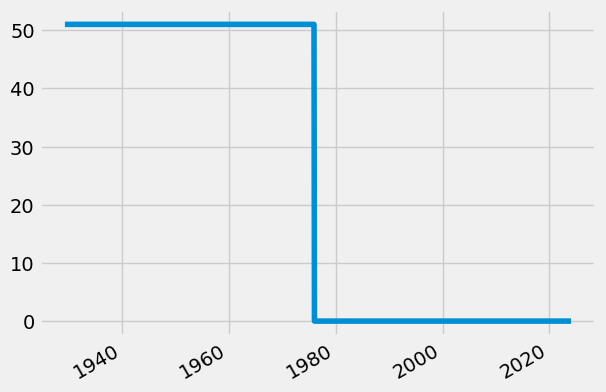

In [75]:
unemp_states.isna().sum(axis=1).plot()

In [76]:
unemp_states.dropna()

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   5.1   3.9   4.6   3.1   3.4   3.6   4.2   2.8   3.4   3.6   4.8   
2023-11-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.3   3.6   4.7   
2023-12-01   5.1   3.9   4.6   3.1   3.4   3.6   4.1   2.8   3.2   3.6   4.7   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.8   3.5   
2023-11-01   4.8   3.2   3.3   4.2   3.4   3.1   4.3   3.0   4.0   2.7   3.5   
2023-12-01   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   4.0   2.7   3.4   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   4.4   2.3   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-11-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.1   2.8   
2023-12-01   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.7   2.9   2.8   

            INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  IDUR  \
1976-01-01   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   5.6   
1976-02-01   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   5.6   
1976-03-01   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   5.6   
1976-04-01   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   5.6   
1976-05-01   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   5.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-10-01   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   3.3   
2023-11-01   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   3.3   
2023-12-01   3.5   4.0   3.0   1.9   3.3   4.9   3.2   3.4   2.5   4.2   3.3   
2024-01-01   3.5   4.1   3.1   1.9   3.3   5.0   3.2   3.4   2.5   4.4   3.3   
2024-02-01   3.5   4.2   3.1   2.0   3.4   5.1   3.1   3.4   2.5   4.5   3.3   

            NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1976-01-01   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-02-01   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
197

In [77]:
unemp_states = unemp_states.dropna()

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



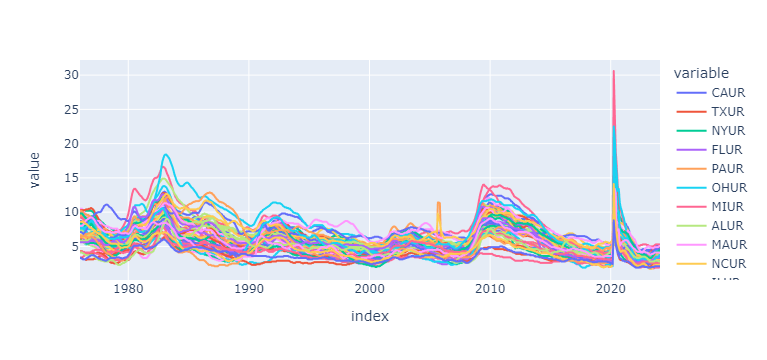

In [78]:
# Plotting the unemployment rate of US States
px.line(unemp_states)

## Covid (2020) unemployment rate per state

In [79]:
unemp_states.loc[unemp_states.index == '2020-05-01']

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
2020-05-01  15.8  11.6  16.7  14.2  12.9  12.8  19.2  10.4  14.9  11.6  14.7   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
2020-05-01  15.4   9.8  11.7  11.2  10.6  10.0  12.8   9.2   9.3  11.2  12.1   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
2020-05-01  13.4   8.8  11.8  12.4  24.7   8.9   9.8   9.6  11.8   8.4   7.7   

            INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  IDUR  \
2020-05-01  12.5  12.3  20.8   7.3   9.2   8.8  11.2   9.5   6.4  11.8   9.1   

            NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
2020-05-01  11.8  15.4   9.1   8.7  13.4   9.5   6.6

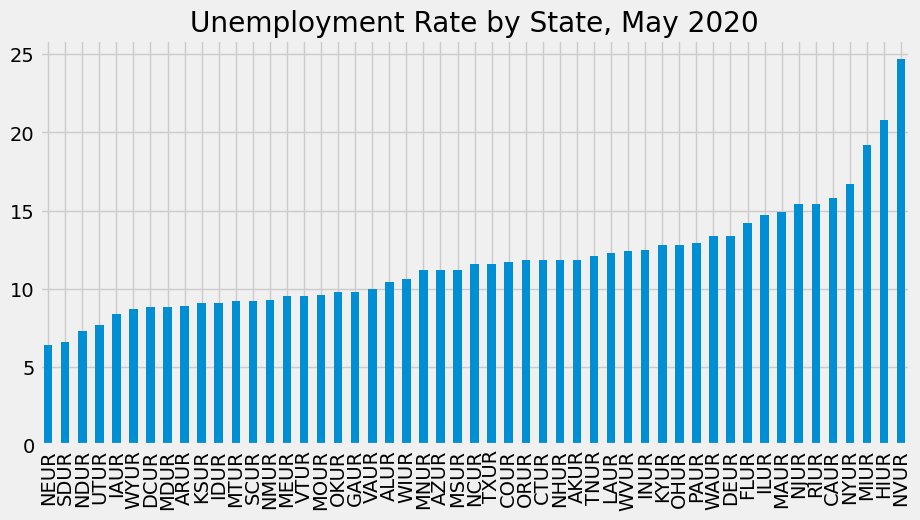

In [80]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='bar', figsize=(10, 5)
          , title='Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

In [160]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

In [161]:
unemp_states.columns

Index([' California', ' Texas', ' New York', ' Florida', ' Pennsylvania',
       ' Ohio', ' Michigan', ' Alabama', ' Massachusetts', ' North Carolina',
       ' Illinois', ' New Jersey', ' Georgia', ' Colorado', ' Arizona',
       ' Wisconsin', ' Virginia', ' Kentucky', ' South Carolina',
       ' New Mexico', ' Minnesota', ' Tennessee', ' Washington', ' Maryland',
       ' Oregon', ' West Virginia', ' Nevada', ' Arkansas', ' Oklahoma',
       ' Missouri', ' Alaska', ' Iowa', ' Utah', ' Indiana', ' Louisiana',
       ' Hawaii', ' North Dakota', ' Montana', ' the District of Columbia',
       ' Mississippi', ' Maine', ' Nebraska', ' Connecticut', ' Idaho',
       ' New Hampshire', ' Rhode Island', ' Kansas', ' Wyoming', ' Delaware',
       ' Vermont', ' South Dakota'],
      dtype='object')

In [162]:
[id_to_state[c] for c in unemp_states.columns]

KeyError: ' California'

In [141]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

KeyError: ' California'

In [142]:
unemp_states

California   Texas   New York   Florida   Pennsylvania   Ohio  \
1976-01-01          9.2     5.8       10.3       9.7            8.0    8.1   
1976-02-01          9.2     5.8       10.3       9.7            8.1    8.1   
1976-03-01          9.1     5.9       10.2       9.6            8.1    8.1   
1976-04-01          9.1     5.9       10.2       9.5            8.1    8.0   
1976-05-01          9.0     5.9       10.1       9.3            8.1    7.8   
...                 ...     ...        ...       ...            ...    ...   
2023-10-01          5.1     3.9        4.6       3.1            3.4    3.6   
2023-11-01          5.1     3.9        4.6       3.1            3.4    3.6   
2023-12-01          5.1     3.9        4.6       3.1            3.4    3.6   
2024-01-01          5.2     3.9        4.5       3.1            3.4    3.7   
2024-02-01          5.3     3.9        4.4       3.1            3.4    3.7   

             Michigan   Alabama   Massachusetts   North Carolina   Illinois  \
1976-01-01        9.9       6.6            10.5              6.4        6.6   
1976-02-01        9.9       6.6            10.5              6.4        6.6   
1976-03-01        9.9       6.6            10.5              6.4        6.6   
1976-04-01        9.8       6.5            10.3              6.3        6.6   
1976-05-01        9.6       6.4            10.1              6.1        6.6   
...               ...       ...             ...              ...        ...   
2023-10-01        4.2       2.8             3.4              3.6        4.8   
2023-11-01        4.1       2.8             3.3              3.6        4.7   
2023-12-01        4.1       2.8             3.2              3.6        4.7   
2024-01-01        4.0       2.9             3.0              3.5        4.7   
2024-02-01        3.9       3.0             2.9              3.5        4.8   

             New Jersey   Georgia   Colorado   Arizona   Wisconsin   Virginia  \
1976-01-01         10.3       8.4        5.8      10.2         5.8        6.1   
1976-02-01         10.3       8.4        5.7      10.2         5.8        6.1   
1976-03-01         10.3       8.4        5.7      10.1         5.7        6.1   
1976-04-01         10.3       8.3        5.6      10.0         5.6        6.0   
1976-05-01         10.3       8.1        5.6       9.8         5.5        5.9   
...                 ...       ...        ...       ...         ...        ...   
2023-10-01          4.8       3.2        3.3       4.2         3.4        3.0   
2023-11-01          4.8       3.2        3.3       4.2         3.4        3.1   
2023-12-01          4.8       3.2        3.3       4.2         3.4        3.0   
2024-01-01          4.8       3.1        3.4       4.2         3.2        3.0   
2024-02-01          4.8       3.1        3.5       4.1         3.0        3.0   

             Kentucky   South Carolina   New Mexico   Minnesota   Tennessee  \
1976-01-01        5.6              7.4          8.6         6.0         6.0   
1976-02-01        5.6              7.4          8.7         6.0         6.0   
1976-03-01        5.6              7.3          8.7         5.9         6.0   
1976-04-01        5.6              7.2          8.6         5.8         6.0   
1976-05-01        5.5              7.0          8.6         5.7         5.9   
...               ...              ...          ...         ...         ...   
2023-10-01        4.3              3.0          4.0         2.8         3.5   
2023-11-01        4.3              3.0          4.0         2.7         3.5   
2023-12-01        4.3              3.0          4.0         2.7         3.4   
2024-01-01        4.3              3.0          4.0         2.7         3.5   
2024-02-01        4.4              3.1          3.9         2.7         3.3   

             Washington   Maryland   Oregon   West Virginia   Nevada  \
1976-01-01          8.5        6.4      9.5             7.5      9.2   
1976-02-01          8.5        6.4      9.5             7.5  

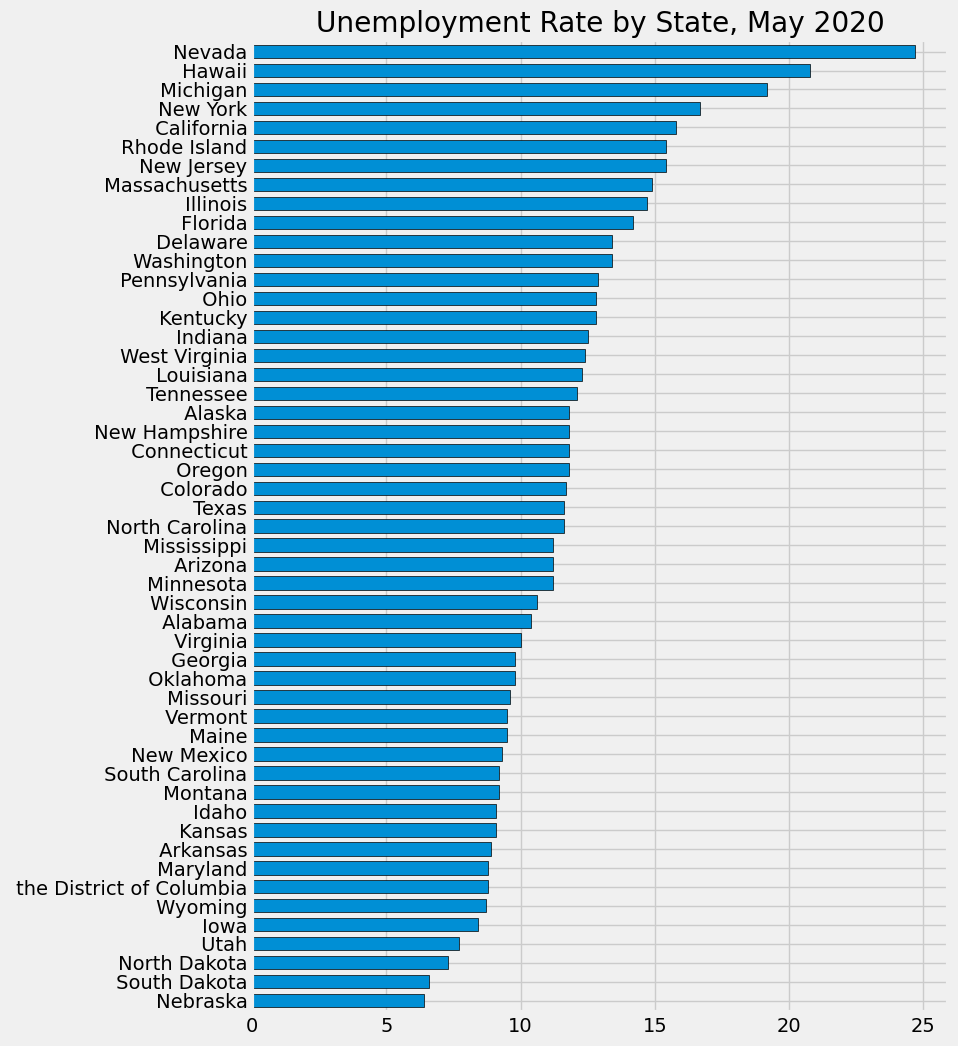

In [86]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width = 0.7, edgecolor='black'
          , title='Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

## Pull participation rate

In [87]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [88]:
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-03-30   2024-03-30   
LNS11300060          LNS11300060     2024-03-30   2024-03-30   
LNS11300002          LNS11300002     2024-03-30   2024-03-30   
LNS11300001          LNS11300001     2024-03-30   2024-03-30   
LNS11324230          LNS11324230     2024-03-30   2024-03-30   
...                          ...            ...          ...   
LRACTTMAUSM156S  LRACTTMAUSM156S     2024-03-30   2024-03-30   
LRINTTMAUSM156S  LRINTTMAUSM156S     2024-03-30   2024-03-30   
LRINTTFEUSM156S  LRINTTFEUSM156S     2024-03-30   2024-03-30   
LRACTTTTUSM156S  LRACTTTTUSM156S     2024-03-30   2024-03-30   
LRINTTTTUSM156S  LRINTTTTUSM156S     2024-03-30   2024-03-30   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRACTTMAUSM156S  Activity Rate: Aged 15 and over: Males for Uni...   
LRINTTMAUSM156S  Inactivity Rate: Aged 15 and over: Males for U...   
LRINTTFEUSM156S  Inactivity Rate: Aged 15 and over: Females for...   
LRACTTTTUSM156S  Activity Rate: Aged 15 and over: All Persons f...   
LRINTTTTUSM156S  Inactivity Rate: Aged 15 and over: All Persons...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-02-01   Monthly               M   
LNS11300060            1948-01-01      2024-02-01   Monthly               M   
LNS11300002            1948-01-01      2024-02-01   Monthly               M   
LNS11300001            1948-01-01      2024-02-01   Monthly               M   
LNS11324230            1948-01-01      2024-02-01   Monthly               M   
...                           ...             ...       ...             ...   
LRACTTMAUSM156S        1960-01-01      2023-12-01   Monthly               M   
LRINTTMAUSM156S        1975-01-01      2023-12-01   Monthly               M   
LRINTTFEUSM156S        1975-01-01      2023-12-01   Monthly               M   
LRACTTTTUSM156S        1960-01-01      2023-12-01   Monthly               M   
LRINTTTTUSM156S        1975-01-01      2023-12-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRACTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTFEUSM156S  Percent           %  Seasonally Adjusted   
LRACTTTTUSM156S  Percent           %  Seasonally Adjusted   
LRINTTTTUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short               last_updated  \
series id                                                              
CIVPART                                SA  2024-03-08 08:03:02-06:00   
LNS11300060                            SA  2024-03-08 08:03:06-06:00   
LNS11300002                            SA  2024-03-08 08:03:11-06:00   
LNS11300001                            SA  2024-03-08 08:03:11-06:00   
LNS11324230                     

In [89]:
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [90]:
part_df.shape

(51, 15)

In [91]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

part_all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    part_all_results.append(results)
part_states = pd.concat(part_all_results, axis=1)

In [92]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [93]:
part_states

California   Alabama   New York   Michigan   Mississippi   Texas  \
1976-01-01         62.6      57.0       58.0       61.6          58.8    63.8   
1976-02-01         62.4      56.9       58.0       61.5          58.6    63.5   
1976-03-01         62.2      56.8       58.0       61.5          58.5    63.4   
1976-04-01         62.2      56.8       58.0       61.6          58.5    63.5   
1976-05-01         62.3      56.8       58.1       61.7          58.5    63.6   
...                 ...       ...        ...        ...           ...     ...   
2023-10-01         62.1      57.5       61.4       62.3          53.9    64.4   
2023-11-01         62.0      57.5       61.4       62.3          53.8    64.3   
2023-12-01         62.1      57.4       61.5       62.3          53.8    64.2   
2024-01-01         62.1      57.4       61.4       62.3          53.8    64.1   
2024-02-01         62.1      57.4       61.4       62.2          53.7    64.1   

             Florida   Kentucky   Ohio   Wisconsin   Pennsylvania  \
1976-01-01      55.8       60.5   61.7        65.6           58.4   
1976-02-01      55.7       60.3   61.7        65.5           58.3   
1976-03-01      55.5       60.2   61.7        65.4           58.3   
1976-04-01      55.5       60.1   61.6        65.4           58.3   
1976-05-01      55.4       60.1   61.6        65.5           58.3   
...              ...        ...    ...         ...            ...   
2023-10-01      59.6       57.0   61.8        66.0           62.3   
2023-11-01      59.5       57.0   61.8        66.0           62.3   
2023-12-01      59.5       56.9   61.8        65.9           62.3   
2024-01-01      59.4       56.9   61.8        65.9           62.4   
2024-02-01      59.4       56.9   61.8        65.7           62.5   

             Massachusetts   Minnesota   Maryland   West Virginia   Tennessee  \
1976-01-01            64.8        65.6       64.3            52.5        59.6   
1976-02-01            64.7        65.5       64.2            52.4        59.4   
1976-03-01            64.6        65.4       64.1            52.3        59.3   
1976-04-01            64.6        65.4       64.1            52.3        59.3   
1976-05-01            64.6        65.5       64.1            52.2        59.4   
...                    ...         ...        ...             ...         ...   
2023-10-01            65.0        68.1       65.3            55.2        59.6   
2023-11-01            64.9        68.1       65.2            55.2        59.6   
2023-12-01            64.9        68.0       65.1            55.2        59.5   
2024-01-01            64.9        68.0       65.1            55.3        59.5   
2024-02-01            64.8        67.9       65.0            55.2        59.5   

             Maine   Illinois   North Carolina   Georgia   Louisiana  \
1976-01-01    62.1       63.0             66.5      63.7        56.8   
1976-02-01    61.9       63.0             66.3      63.6        56.6   
1976-03-01    61.9       62.9             66.2      63.5        56.5   
1976-04-01    61.8       62.9             66.2      63.5        56.4   
1976-05-01    61.7       63.0             66.3      63.6        56.4   
...            ...        ...              ...       ...         ...   
2023-10-01    59.4       64.5             60.9      61.6        58.6   
2023-11-01    59.4       64.5             60.8      61.5        58.6   
2023-12-01    59.3       64.5             60.7      61.5        58.6   
2024-01-01    59.3       64.6             60.7      61.4        58.7   
2024-02-01    59.3       64.6             60.7      61.4        58.7   

             South Carolina   Colorado   Utah   Virginia   Indiana   Missouri  \
1976-01-01             65.3       67.2   62.8       65.9      64.0       60.5   
1976-02-01             65.2       67.0   62.6       65.8      63.9       60.3   
1976-03-01             65.0       66.8   62.5       65.6      63.8       60.3   
1976-04-01             64.9       66.6   62.5    

## Plot unemployment vs participation

In [179]:
# Fix DC
unemp_states = unemp_states.rename(columns={' the District of Columbia':' District Of Columbia'})

<Axes: >

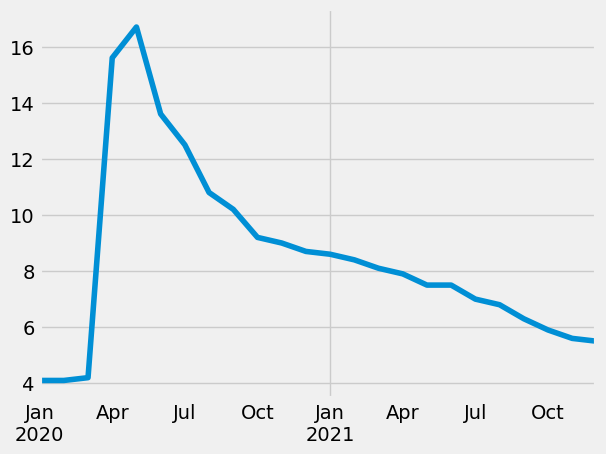

In [180]:
unemp_states.query('index >= 2020 and index < 2022')[' New York'].plot()

Text(0.5, 1.0, 'New York')

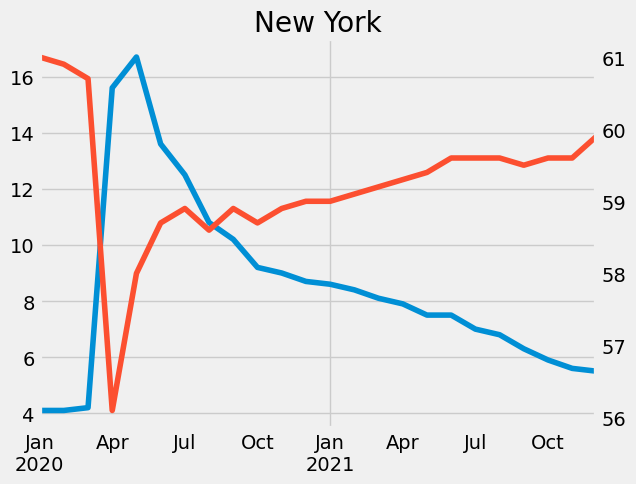

In [181]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')[' New York'] \
    .plot(ax=ax, label='Unemployment') 
part_states.query('index >= 2020 and index < 2022')[' New York'] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

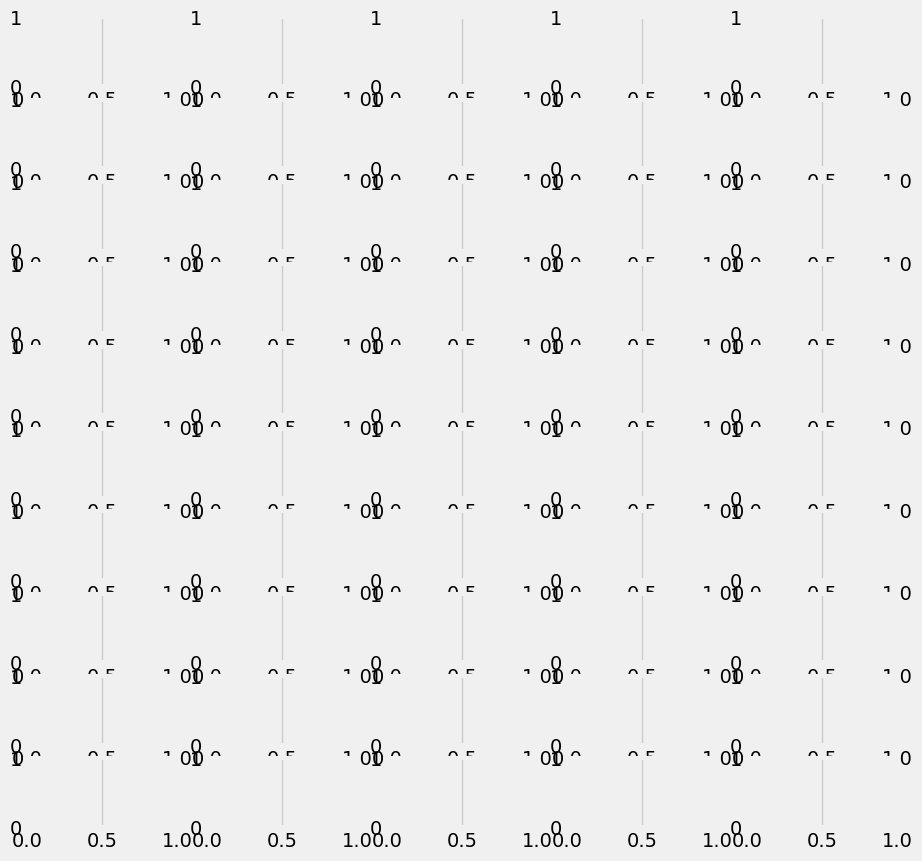

In [156]:
fig, axs = plt.subplots(10, 5, figsize=(10, 10))
axs = axs.flatten()
# ax2 = ax.twinx()
# unemp_states.query('index >= 2020 and index < 2022')[' New York'] \
#     .plot(ax=ax, label='Unemployment') 
# part_states.query('index >= 2020 and index < 2022')[' New York'] \
#     .plot(ax=ax2, label='Participation', color=color_pal[1])
# ax2.grid(False)
# ax.set_title('New York')

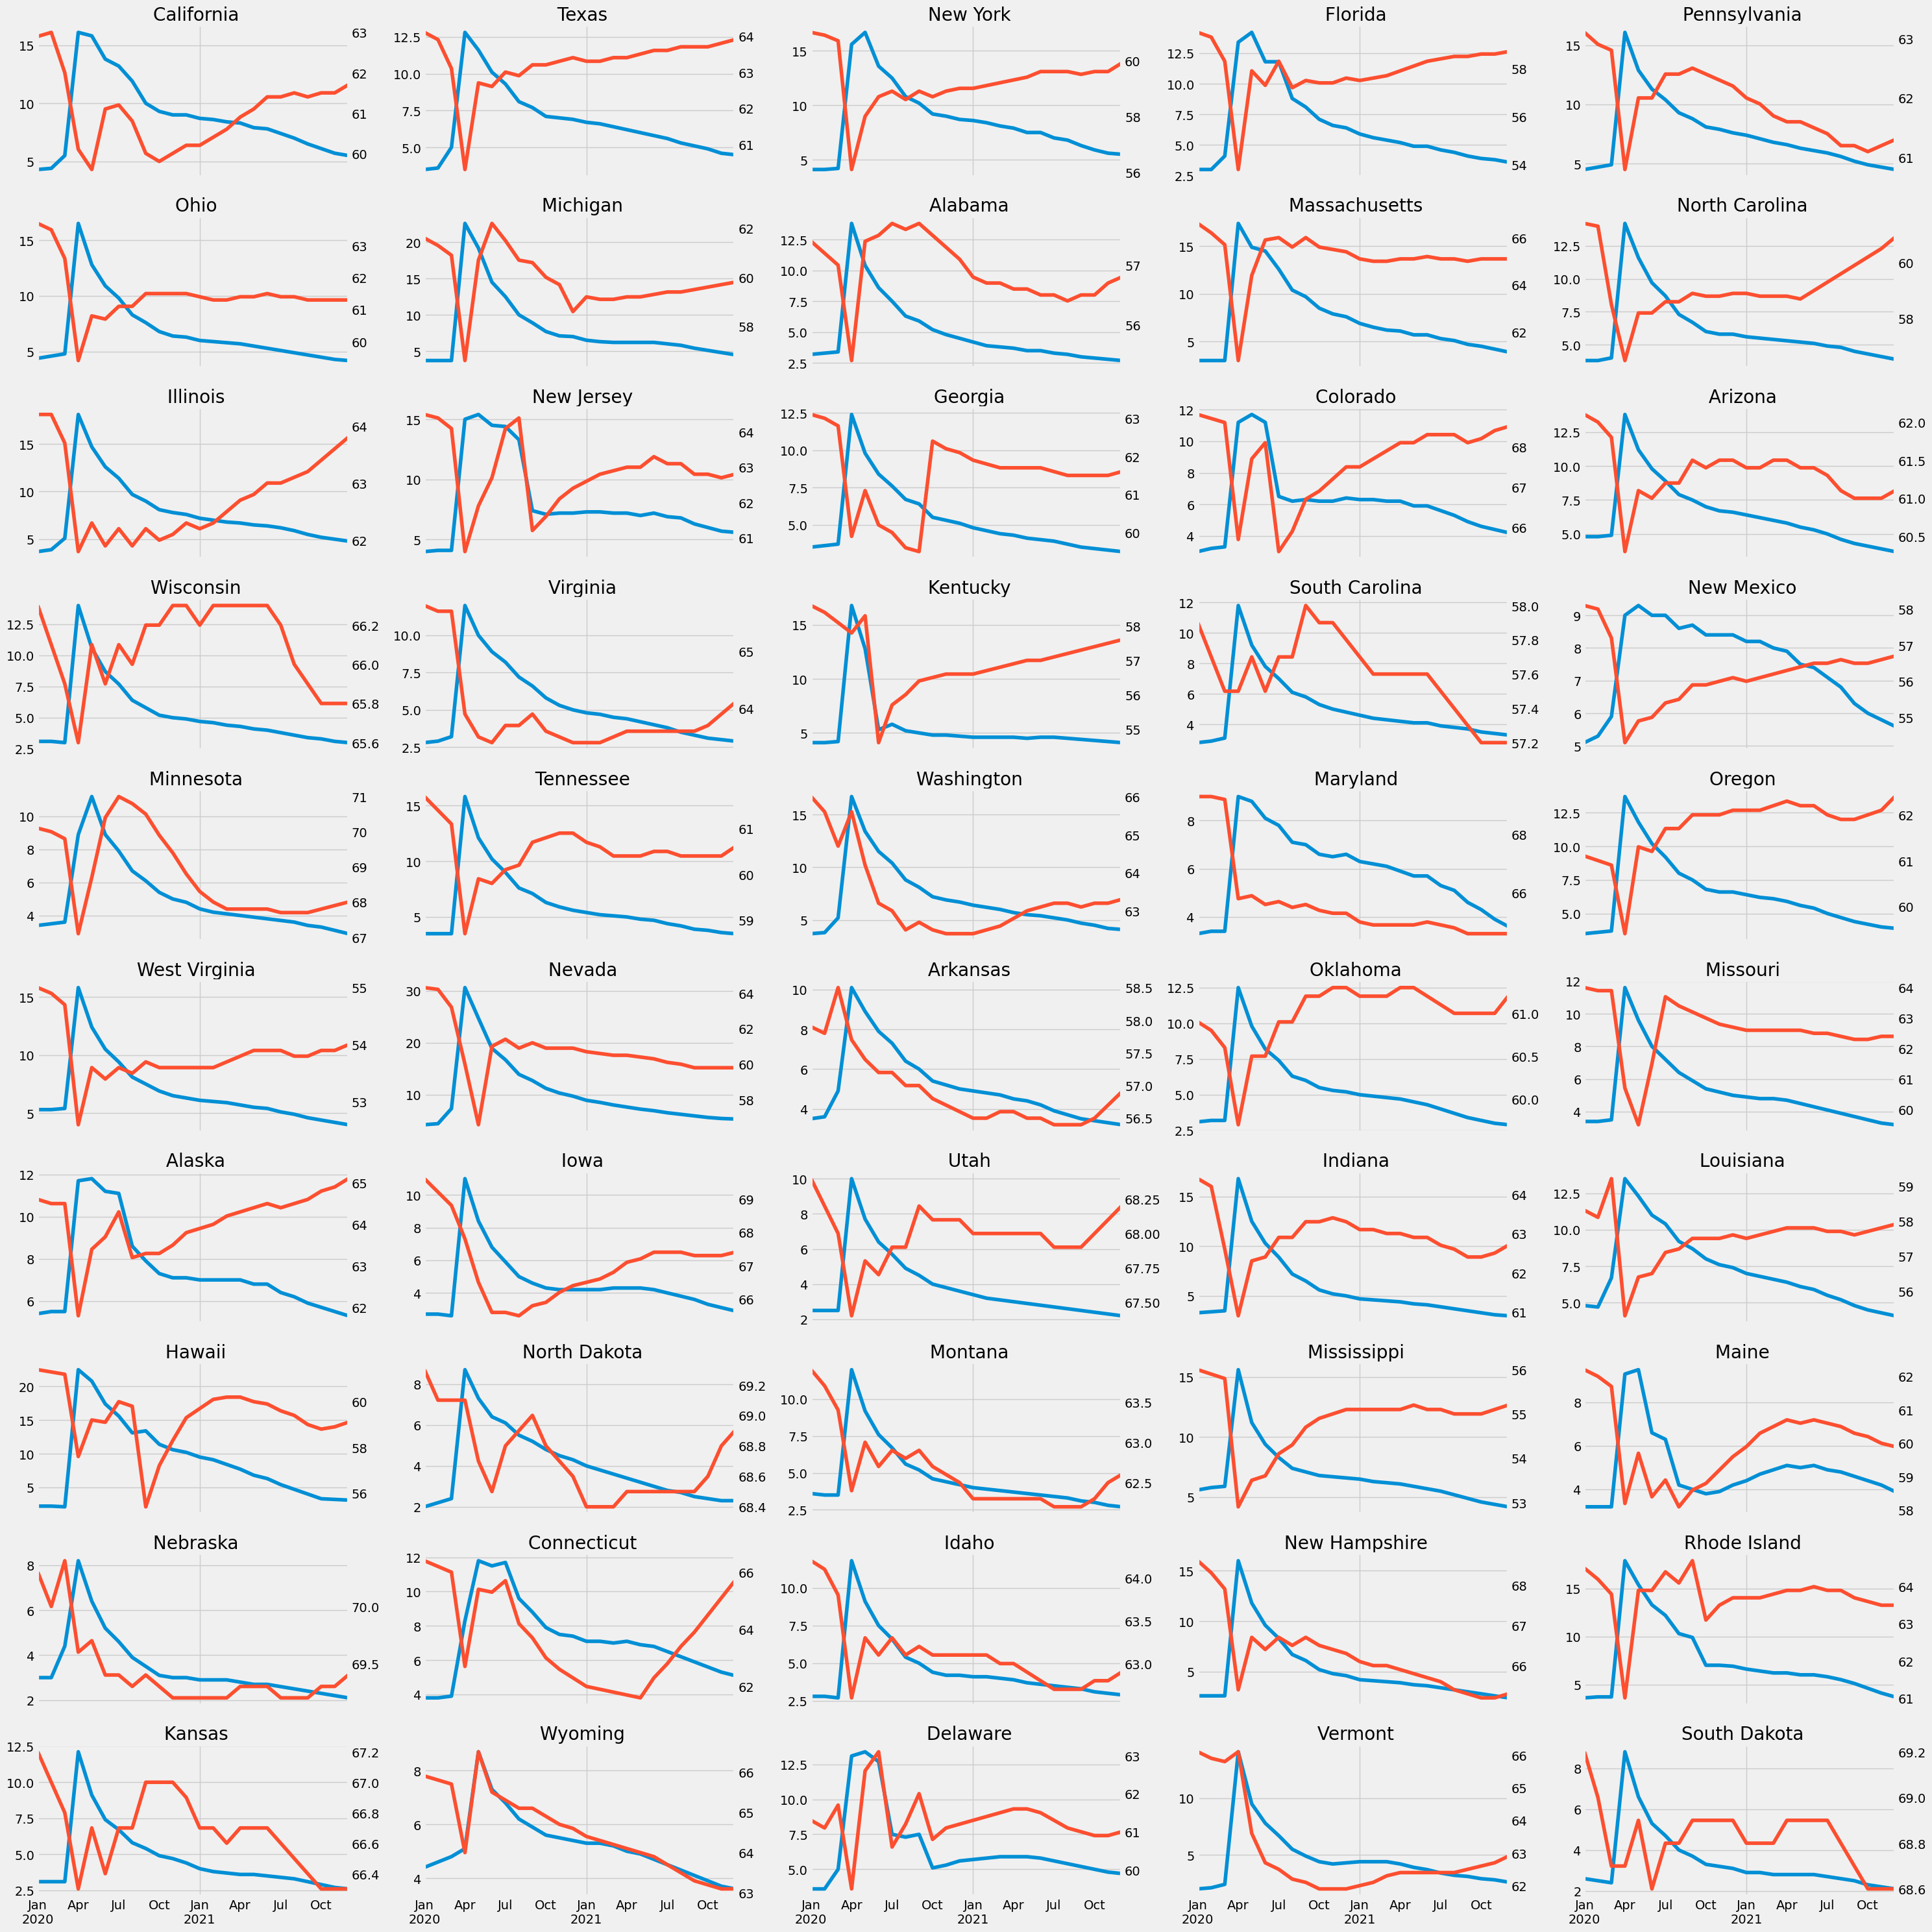

In [188]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == " District of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment') 
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()